### Telecom Churn Prediction

Project List :
Problem Statement: This is a telecom dataset. The columns are self-explanatory.
https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset

* Data Set Information:

This dataset is randomly collected from an Iranian telecom company s database over a period of 12 months.

A total of 3150 rows of data, each representing a customer, bear information for 13 columns. 

The attributes that are in this dataset are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

* Attribute Information:

Anonymous Customer ID

Call Failures: number of call failures

Complains: binary (0: No complaint, 1: complaint)

Subscription Length: total months of subscription

Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)

Seconds of Use: total seconds of calls

Frequency of use: total number of calls

Frequency of SMS: total number of text messages

Distinct Called Numbers: total number of distinct phone calls

Age Group: ordinal attribute (1: younger age, 5: older age)

Tariff Plan: binary (1: Pay as you go, 2: contractual)

Status: binary (1: active, 2: non-active)

Churn: binary (1: churn, 0: non-churn) - Class label

Customer Value: The calculated value of customer

* Objective:

The objective of the project is to create a model to predict if a customer will churn or not.

Explain whether it is a case of supervised or unsupervised learning.

Later, explain the choice of the performance evaluation metric.

In [1]:
# Import the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df_data = pd.read_csv("data/Customer Churn.csv")

In [3]:
#Outcome columns is the target column 
# null datapresent in this dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
df_data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [6]:
df_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [7]:
df_data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [9]:
df_data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [12]:
df_data.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [13]:
df_data.Churn.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [14]:
df_data.Age.value_counts()

Age
30    1425
25    1037
45     395
55     170
15     123
Name: count, dtype: int64

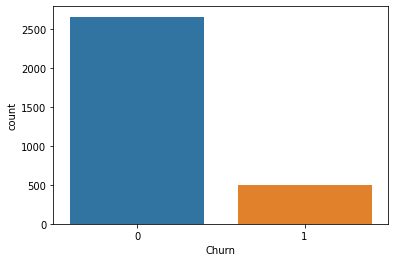

In [15]:
# Plot the outcome variable 
sns.countplot(x= 'Churn', data=df_data)
plt.show()

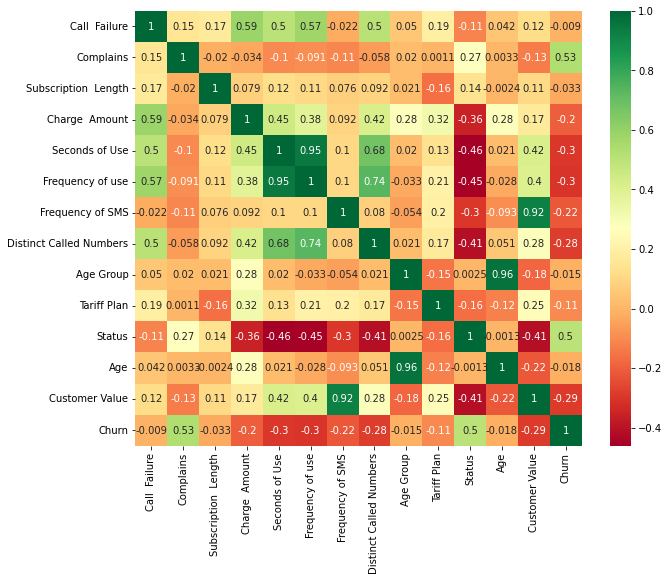

In [17]:
# Correlation Plot 
sns.heatmap(df_data[df_data.columns[:14]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### The objective of the project is to create a model to predict if a customer will churn or not.

In [19]:
#Split the dataset in features and target variable 
feature_cols = ['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value']
X = df_data[feature_cols] #features
y = df_data.Churn #Target variable

In [20]:
#Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [21]:
X_train.shape

(2362, 13)

In [22]:
#Import the class
from sklearn.linear_model import LogisticRegression

#Instantiate the model
logreg = LogisticRegression(max_iter=10000)

#fit the model with data
logreg.fit(X_train,y_train)

#Predict for test dataset
y_pred=logreg.predict(X_test)

In [23]:
#Import the metrics class
from sklearn import metrics 

In [24]:
#Create Confusion Matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[634,  14],
       [ 76,  64]], dtype=int64)

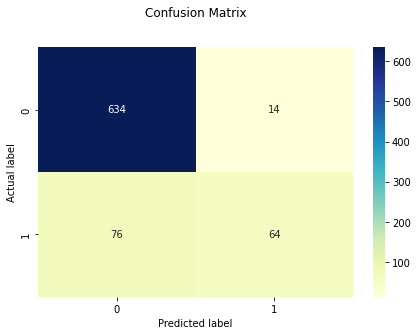

In [25]:
class_names = [0, 1]  # Nombres de las clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Crear un mapa de calor (heatmap)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [26]:
# Print the model evaluation metrics 

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8857868020304569
Precision: 0.8205128205128205
Recall: 0.45714285714285713


In [27]:
#testing the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [31]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8857868020304569
Precision: 0.8205128205128205
Recall: 0.45714285714285713
F1 Score: 0.5871559633027523


### Explain whether it is a case of supervised or unsupervised learning.

This is a case of supervised learning because the objective is to create a model to predict whether a customer will churn or not, which is a binary classification problem. The dataset provides labeled data with the "Churn" column indicating whether a customer has churned or not.

### Later, explain the choice of the performance evaluation metric.

The choice of performance evaluation metrics depends on the specific requirements and priorities of the project. Let's discuss the values of the evaluation metrics for the given model:

* Accuracy: 0.8858
Accuracy measures the overall correctness of the predictions, indicating the proportion of correctly predicted churn or non-churn cases out of the total predictions. In this case, the model achieves an accuracy of 0.8858, which means that approximately 88.58% of the predictions are correct.

* Precision: 0.8205
Precision is the proportion of correctly predicted positive cases (churn) out of all predicted positive cases. A higher precision indicates a lower rate of false positives, meaning that the model is good at correctly identifying actual churn cases. Here, the precision is 0.8205, suggesting that about 82.05% of the predicted churn cases are true positives.

* Recall: 0.4571
Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive cases (churn) out of all actual positive cases. A higher recall indicates a lower rate of false negatives, meaning that the model is good at capturing actual churn cases. In this case, the recall is 0.4571, indicating that approximately 45.71% of the actual churn cases are correctly predicted by the model.

* F1 Score: 0.5872
The F1 score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It considers both false positives and false negatives. A higher F1 score indicates a better balance between precision and recall. The F1 score for this model is 0.5872, which suggests a reasonable balance between correctly identifying churn cases and minimizing false positives and false negatives.

Based on these evaluation metrics, we can interpret the model's performance as follows: The model achieves a high accuracy, indicating that a large proportion of the predictions are correct. The precision score indicates that the model is good at correctly identifying churn cases, with a relatively low rate of false positives. However, the recall score is relatively low, indicating that the model may miss a significant number of actual churn cases, resulting in a higher rate of false negatives. The F1 score, being the harmonic mean of precision and recall, provides a balanced measure, taking into account both false positives and false negatives.
